### Import Libraries

In [1]:
# Load, explore, process and plot data
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

# Train Test Split
from sklearn.model_selection import train_test_split,cross_val_score

#Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Machine Larning Modeling
import sklearn
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV


# Deep Learning Modeling
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Embedding,SpatialDropout1D, Dropout, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Performance metrices
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical


#Logging
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

## Load Datasets

In [2]:
data_frame_train = pd.read_csv('dataset/BBC News Train.csv')
data_frame_test = pd.read_csv('dataset/BBC News Test.csv')
print(data_frame_train.shape)
print(data_frame_test.shape)

(1490, 3)
(735, 2)


In [4]:
data_frame_train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [5]:
data_frame_test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [6]:
data_frame_train.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [7]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [8]:
data_frame_train['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [9]:
data_frame_train.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

In [10]:
category_count = data_frame_train['Category'].value_counts()
categories = category_count.index
categories

Index(['sport', 'business', 'politics', 'entertainment', 'tech'], dtype='object')

## Exploratory Data Analysis

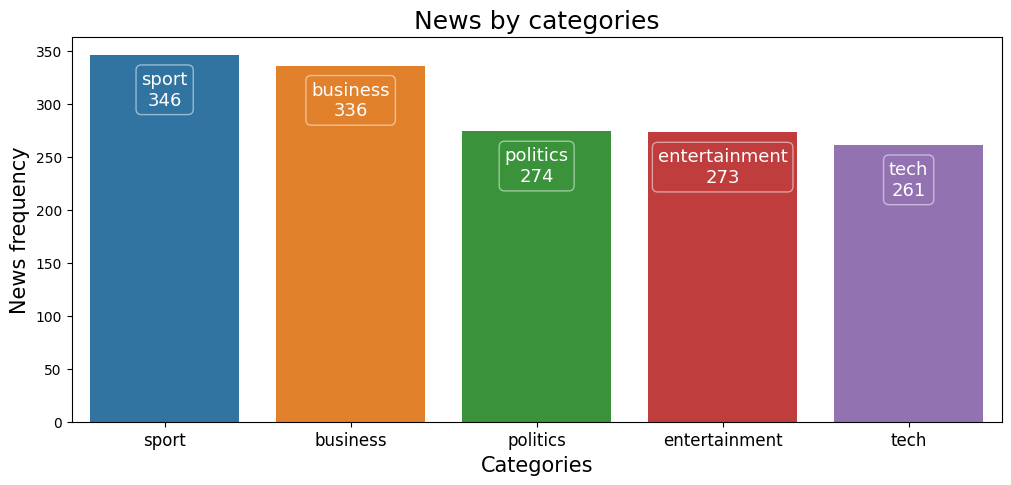

In [11]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 15)

plt.ylabel('News frequency', size= 15)

plt.xticks(size = 12)

plt.title("News by categories" , size = 18)

plt.show()

## Text Preprocessing

In [12]:
def preprocessing(sentence):
  sentence = re.sub(r"n\'t", " not", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'s", " is", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'t", " not", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'m", " am", sentence)
  sentence = re.sub(r"wont", "will not", sentence)
  sentence = re.sub(r"wouldnt", "would not", sentence)
  sentence = re.sub(r"shouldnt", "should not", sentence)
  sentence = re.sub(r"couldnt", "could not", sentence)
  sentence = re.sub(r"cudnt", "could not", sentence)
  sentence = re.sub(r"cant", "can not", sentence)
  sentence = re.sub(r"dont", "do not", sentence)
  sentence = re.sub(r"doesnt", "does not", sentence)
  sentence = re.sub(r"didnt", "did not", sentence)
  sentence = re.sub(r"wasnt", "was not", sentence)
  sentence = re.sub(r"werent", "were not", sentence)
  sentence = re.sub(r"havent", "have not", sentence)
  sentence = re.sub(r"hadnt", "had not", sentence)
  sentence = re.sub(r"ain't", "am not",sentence)
  sentence = re.sub(r"aren't", "are not",sentence)
  sentence = re.sub(r"can't", "cannot",sentence)
  sentence = re.sub(r"can't've", "cannot have",sentence)
  sentence = re.sub(r"'cause", "because",sentence)
  sentence = re.sub(r"could've", "could have",sentence)
  sentence = re.sub(r"couldn't", "could not",sentence)
  sentence = re.sub(r"couldn't've", "could not have",sentence)
  sentence = re.sub(r"didn't", "did not",sentence)
  sentence = re.sub(r"doesn't", "does not",sentence)
  sentence = re.sub(r"don't", "do not",sentence)
  sentence = re.sub(r"hadn't", "had not",sentence)
  sentence = re.sub(r"hadn't've", "had not have",sentence)
  sentence = re.sub(r"hasn't", "has not",sentence)
  sentence = re.sub(r"haven't", "have not",sentence)
  sentence = re.sub(r"he'd", "he would",sentence)
  sentence = re.sub(r"he'd've", "he would have",sentence)
  sentence = re.sub(r"he'll", "he will",sentence)
  sentence = re.sub(r"he'll've", "he will have",sentence)
  sentence = re.sub(r"he's", "he is",sentence)
  sentence = re.sub(r"how'd", "how did",sentence)
  sentence = re.sub(r"how'd'y", "how do you",sentence)
  sentence = re.sub(r"how'll", "how will",sentence)
  sentence = re.sub(r"how's", "how is",sentence)
  sentence = re.sub(r"i'd", "I would",sentence)
  sentence = re.sub(r"i'd've", "I would have",sentence)
  sentence = re.sub(r"i'll", "I will",sentence)
  sentence = re.sub(r"i'll've", "I will have",sentence)
  sentence = re.sub(r"i'm", "I am",sentence)
  sentence = re.sub(r"i've", "I have",sentence)
  sentence = re.sub(r"isn't", "is not",sentence)
  sentence = re.sub(r"it'd", "it had",sentence)
  sentence = re.sub(r"it'd've", "it would have",sentence)
  sentence = re.sub(r"it'll", "it will",sentence)
  sentence = re.sub(r"it'll've", "it will have",sentence)
  sentence = re.sub(r"it's", "it is",sentence)
  sentence = re.sub(r"let's", "let us",sentence)
  sentence = re.sub(r"ma'am", "madam",sentence)
  sentence = re.sub(r"mayn't", "may not",sentence)
  sentence = re.sub(r"might've", "might have",sentence)
  sentence = re.sub(r"mightn't", "might not",sentence)
  sentence = re.sub(r"mightn't've", "might not have",sentence)
  sentence = re.sub(r"must've", "must have",sentence)
  sentence = re.sub(r"mustn't", "must not",sentence)
  sentence = re.sub(r"mustn't've", "must not have",sentence)
  sentence = re.sub(r"needn't", "need not",sentence)
  sentence = re.sub(r"needn't've", "need not have",sentence)
  sentence = re.sub(r"o'clock", "of the clock",sentence)
  sentence = re.sub(r"oughtn't", "ought not",sentence)
  sentence = re.sub(r"oughtn't've", "ought not have",sentence)
  sentence = re.sub(r"shan't", "shall not",sentence)
  sentence = re.sub(r"sha'n't", "shall not",sentence)
  sentence = re.sub(r"shan't've", "shall not have",sentence)
  sentence = re.sub(r"she'd", "she would",sentence)
  sentence = re.sub(r"she'd've", "she would have",sentence)
  sentence = re.sub(r"she'll", "she will",sentence)
  sentence = re.sub(r"she'll've", "she will have",sentence)
  sentence = re.sub(r"she's", "she is",sentence)
  sentence = re.sub(r"should've", "should have",sentence)
  sentence = re.sub(r"shouldn't", "should not",sentence)
  sentence = re.sub(r"shouldn't've", "should not have",sentence)
  sentence = re.sub(r"so've", "so have",sentence)
  sentence = re.sub(r"so's", "so is",sentence)
  sentence = re.sub(r"that'd", "that would",sentence)
  sentence = re.sub(r"that'd've", "that would have",sentence)
  sentence = re.sub(r"that's", "that is",sentence)
  sentence = re.sub(r"there'd", "there had",sentence)
  sentence = re.sub(r"there'd've", "there would have",sentence)
  sentence = re.sub(r"there's", "there is",sentence)
  sentence = re.sub(r"they'd", "they would",sentence)
  sentence = re.sub(r"they'd've", "they would have",sentence)
  sentence = re.sub(r"they'll", "they will",sentence)
  sentence = re.sub(r"they'll've", "they will have",sentence)
  sentence = re.sub(r"they're", "they are",sentence)
  sentence = re.sub(r"they've", "they have",sentence)
  sentence = re.sub(r"to've", "to have",sentence)
  sentence = re.sub(r"wasn't", "was not",sentence)
  sentence = re.sub(r"we'd", "we had",sentence)
  sentence = re.sub(r"we'd've", "we would have",sentence)
  sentence = re.sub(r"we'll", "we will",sentence)
  sentence = re.sub(r"we'll've", "we will have",sentence)
  sentence = re.sub(r"we're", "we are",sentence)
  sentence = re.sub(r"we've", "we have",sentence)
  sentence = re.sub(r"weren't", "were not",sentence)
  sentence = re.sub(r"what'll", "what will",sentence)
  sentence = re.sub(r"what'll've", "what will have",sentence)
  sentence = re.sub(r"what're", "what are",sentence)
  sentence = re.sub(r"what's", "what is",sentence)
  sentence = re.sub(r"what've", "what have",sentence)
  sentence = re.sub(r"when's", "when is",sentence)
  sentence = re.sub(r"when've", "when have",sentence)
  sentence = re.sub(r"where'd", "where did",sentence)
  sentence = re.sub(r"where's", "where is",sentence)
  sentence = re.sub(r"where've", "where have",sentence)
  sentence = re.sub(r"who'll", "who will",sentence)
  sentence = re.sub(r"who'll've", "who will have",sentence)
  sentence = re.sub(r"who's", "who is",sentence)
  sentence = re.sub(r"who've", "who have",sentence)
  sentence = re.sub(r"why's", "why is",sentence)
  sentence = re.sub(r"why've", "why have",sentence)
  sentence = re.sub(r"will've", "will have",sentence)
  sentence = re.sub(r"won't", "will not",sentence)
  sentence = re.sub(r"won't've", "will not have",sentence)
  sentence = re.sub(r"would've", "would have",sentence)
  sentence = re.sub(r"wouldn't", "would not",sentence)
  sentence = re.sub(r"wouldn't've", "would not have",sentence)
  sentence = re.sub(r"y'all", "you all",sentence)
  sentence = re.sub(r"y'alls", "you alls",sentence)
  sentence = re.sub(r"y'all'd", "you all would",sentence)
  sentence = re.sub(r"y'all'd've", "you all would have",sentence)
  sentence = re.sub(r"y'all're", "you all are",sentence)
  sentence = re.sub(r"y'all've", "you all have",sentence)
  sentence = re.sub(r"you'd", "you had",sentence)
  sentence = re.sub(r"you'd've", "you would have",sentence)
  sentence = re.sub(r"you'll", "you you will",sentence)
  sentence = re.sub(r"you'll've", "you you will have",sentence)
  sentence = re.sub(r"you're", "you are",sentence)
  sentence = re.sub(r"you've", "you have",sentence)

  
  sentence = re.sub(r'[^\w\s]','',sentence) # Remove Punctutation
  
  sentence = sentence.lower() # Lower case
  
  CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  sentence = re.sub(CLEANR, '', sentence)# Remove HTML
  
  sentence = re.sub('[^A-Za-z]',' ',sentence)# Remove Digits
 
  sentence = re.sub(r'[\w._%+-]{1,20}@[\w.-]{1,20}.[A-Za-z]{2,3}','', sentence)# Remove Email
  
  sentence = re.sub(r'^http?s:\/\/.*[\r\n]*','', sentence)# Remove URLs
  
  sentence = re.sub(r'@[A-Za-z0-9]+','',sentence) #Remove Mentions  

  sentence = " ".join(item for item in sentence.split() if item not in stopwords.words('english') )
  
  sentence = ' '.join([PorterStemmer().stem(word)for word in sentence.split()])

  sentence = ' '.join([WordNetLemmatizer().lemmatize(word) for word in sentence.split()])
  return sentence


In [13]:
data_frame_train['Token'] = data_frame_train.Text.apply(lambda sentence : preprocessing(sentence))

In [15]:
data_frame_train.head()

,ArticleId,Text,Category,Token
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launch defenc lawyer defend fo...
1,154,german business confidence slides german busin...,business,german busi confid slide german busi confid fe...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indic econom gloom citizen major nati...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyl govern mobil choic faster better funk...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bos payout eighteen former enron directo...


In [16]:
X = data_frame_train.Token
Y = data_frame_train.Category
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1192,) (1192,)
(298,) (298,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
TfIdf_Vectorizer = TfidfVectorizer(tokenizer = token.tokenize)

X_train_transformed = TfIdf_Vectorizer.fit_transform(X_train)

#X_test_transformed = TfIdf_Vectorizer.transform(X_test)

In [18]:
with open("TF-IDF/TfIdf_Vectorizer.pk", "wb") as f:
    pk.dump(TfIdf_Vectorizer, f)

with open("TF-IDF/TfIdf_Vectorizer.pk", "rb") as f:
    vector = pk.load(f)

## Convert Categorical labels into numerics

In [19]:
label_fit = LabelEncoder()
label_fit.fit(Y)
Y_train_transformed = label_fit.transform(Y_train)
Y_test_transformed = label_fit.transform(Y_test)
print(label_fit.classes_)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [20]:
class_names = label_fit.classes_
class_names

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [21]:
integer_mapping = {l: i for i, l in enumerate(label_fit.classes_)}

In [22]:
integer_mapping

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [23]:
with open("Labels/label_fit.pk", "wb") as f:
    pk.dump(label_fit, f)

with open("Labels/label_fit.pk", "rb") as f:
    label_fit = pk.load(f)

**Display Output in Heat Map**

In [24]:
def plot_matrix(y_test, y_pred, color="Greens"):
    labels = np.unique(y_pred)
    cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=labels)
    sns.heatmap(cm_df, annot=True, fmt='g', cmap=color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

## Naive Bayes

**Multinomial NB**

Average accuracy on test set=0.959731543624161
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        78
           1       0.96      1.00      0.98        44
           2       0.95      0.90      0.92        59
           3       1.00      0.97      0.98        65
           4       0.90      1.00      0.95        52

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



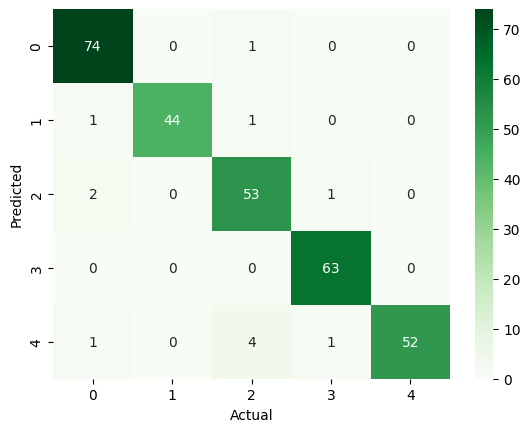

In [25]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train_transformed, Y_train_transformed)
Y_predicted_MNB = model_MNB.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_MNB == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_MNB,Y_test_transformed))
plot_matrix(Y_test_transformed, Y_predicted_MNB)

In [26]:
with open("models/model_MNB.pk", "wb") as f:
    pk.dump(model_MNB, f)

with open("models/model_MNB.pk", "rb") as f:
    model_MNB = pk.load(f) 

In [27]:
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import wordnet
def detect_catagory(model,article):
  sentence = preprocessing(article)
  sentence = list(sentence.split(" "))
  p_tfidf = vector.transform(sentence)
  result1 = model.predict(p_tfidf)[0]
  result = label_fit.inverse_transform(model.predict(p_tfidf))[0]
  probability_score = model.predict_proba(p_tfidf)[result1]
        
  return result,probability_score

In [28]:
import random
try:
  test_sentences = data_frame_test['Text'].to_list()
  test_samples = random.sample(test_sentences, 1)
  for item in test_samples:
    message = preprocessing(str(item))
    input = [message]
    p_tfidf = vector.transform(input)
    predict_index = model_MNB.predict(p_tfidf)[0]
    predict_category = label_fit.inverse_transform(model_MNB.predict(p_tfidf))[0]
    #score = model_MNB.predict_proba(vector.transform(input))[predict_index]
    print(f"Predict Index: {predict_index}")
    #print(f"Predict Probabilities: {score}")
    print(f"Predict Category: {predict_category}")
    
    print(f"Predict Text: {item}")
       
    print("---------------------------------------------------------\n")
except Exception as e:
  print(f'Error raised!!: {e}') 

Predict Index: 3
Predict Category: sport
Predict Text: henman hopes ended in dubai third seed tim henman slumped to a straight sets defeat in his rain-interrupted dubai open quarter-final against ivan ljubicic.  the croatian eighth seed booked his place in the last four with a 7-5 6-4 victory over the british number one. henman had looked on course to level the match after going 2-0 up in the second set  but his progress was halted as the rain intervened again. ljubicic hit back after the break to seal a fourth straight win over henman. earlier in the day  spanish fifth seed tommy robredo secured his semi-final place when he beat nicolas kiefer of germany 6-4 6-4. afterwards  henman was left cursing the weather and the umpire after seven breaks for rain during the match.  it was incredibly frustrating   henman said.  it s raining and the umpire doesn t take control.  he kept telling us to play till the end of the game. but if it s raining  you come off - the score s irrelevant.  it cou

In [29]:
article1 = '''Google Pixel has added a new spatial audio feature with its January update for Pixel 6, 6 Pro, 7 and 7 Pro. The Verge has confirmed that a toggle for this feature has appeared in the settings menu of the Google Pixel 6 Pro. This update will roll out soon to other Pixel devices as well. The Google support page states that it will be able to support audio from apps with 5.1 surround sound.'''

In [30]:
article2 = '''Thursday reiterated its call for peace and tranquillity in border areas for the development of the relationship with China in the face of comments by the new Chinese foreign minister about both sides being willing to ease the situation in relation to the standoff on the Line of Actual Control (LAC).. '''

In [31]:
article3 = '''Apple has agreed to pay $50m (£41.6m) to settle a legal action by claimants in the US, over its MacBook keyboards.Customers in seven states claimed the technology giant had sold the "butterfly" keyboards, on MacBook, MacBook Air and MacBook Pro laptops, from 2015 to 2019, knowing they had unresponsive and sticky keys that could be damaged by dust or debris.Apple did not immediately respond to a BBC News request for comment.But the company denies any wrongdoing.The settlement could see customers receiving up to:$395, if they replaced multiple keyboards$125, if they replaced one
$50 for those who replaced key caps
The preliminary agreement is still subject to approval by a judge.On a typical keyboard, keys are attached using two pieces of plastic that cross each other and close like a pair of scissors when pressed.The butterfly-keyboard keys instead used a wing-like hinge.At the time, Apple said this mechanism was 40% thinner, so its laptops could be slimmer.'''

In [32]:
detect_catagory(model_MNB,article1)

('tech', array([0.21895973, 0.19043624, 0.18288591, 0.23741611, 0.17030201]))

In [33]:
detect_catagory(model_MNB,article2)

('business',
 array([0.30546017, 0.18293817, 0.2054661 , 0.19851348, 0.10762208]))

In [34]:
detect_catagory(model_MNB,article3)

('tech', array([0.23837287, 0.15522151, 0.27783055, 0.13781907, 0.19075601]))

**Bernoulli Naive Bayes**

Average accuracy on test set=0.9697986577181208
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        82
           1       1.00      0.98      0.99        47
           2       0.95      0.98      0.96        54
           3       1.00      1.00      1.00        63
           4       0.90      1.00      0.95        52

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



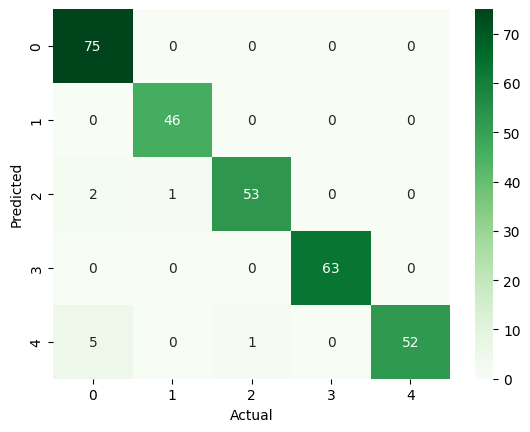

In [35]:
model_BNB = BernoulliNB()
model_BNB.fit(X_train_transformed, Y_train_transformed)
Y_predicted_BNB = model_BNB.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_BNB == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_BNB,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_BNB)

**Complement Naive Beyes**

Average accuracy on test set=0.9765100671140939
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       1.00      1.00      1.00        46
           2       0.95      0.96      0.95        55
           3       1.00      0.97      0.98        65
           4       0.97      0.98      0.97        57

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298



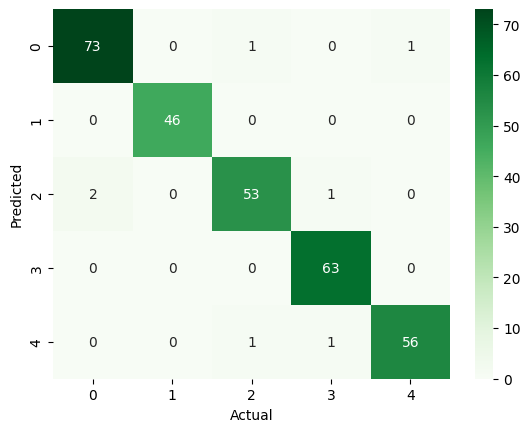

In [36]:
model_CNB = ComplementNB()
model_CNB.fit(X_train_transformed, Y_train_transformed)
Y_predicted_CNB = model_CNB.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_CNB == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_CNB,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_CNB)

**K Nearest Neighbors**

Average accuracy on test set=0.9395973154362416
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.93      0.96      0.95        45
           2       0.91      0.86      0.89        59
           3       1.00      0.98      0.99        64
           4       0.90      0.96      0.93        54

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



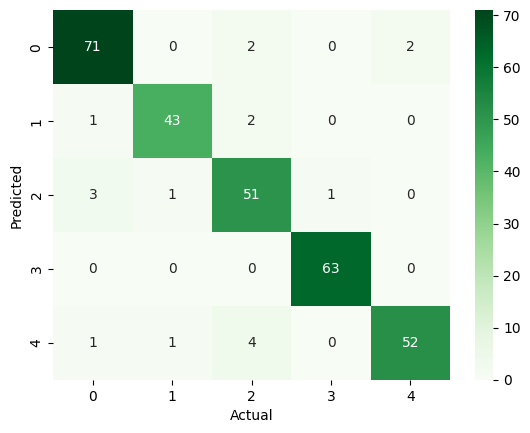

In [37]:
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_KNN.fit(X_train_transformed, Y_train_transformed)
Y_predicted_KNN = model_KNN.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_KNN == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_KNN,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_KNN)

**Stochastic Gradient Descendent classifier**

Average accuracy on test set=0.9731543624161074
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        76
           1       0.98      0.98      0.98        46
           2       0.96      0.95      0.96        57
           3       1.00      0.97      0.98        65
           4       0.93      1.00      0.96        54

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



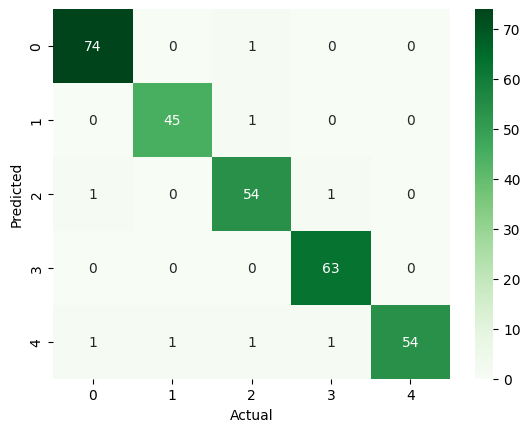

In [38]:
model_SGD = SGDClassifier(loss='hinge')
model_SGD.fit(X_train_transformed, Y_train_transformed)
Y_predicted_SGD = model_SGD.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_SGD == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_SGD,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_SGD)

**Logistic Regression**

Average accuracy on test set=0.9664429530201343
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        77
           1       0.98      0.98      0.98        46
           2       0.95      0.95      0.95        56
           3       1.00      0.95      0.98        66
           4       0.91      1.00      0.95        53

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



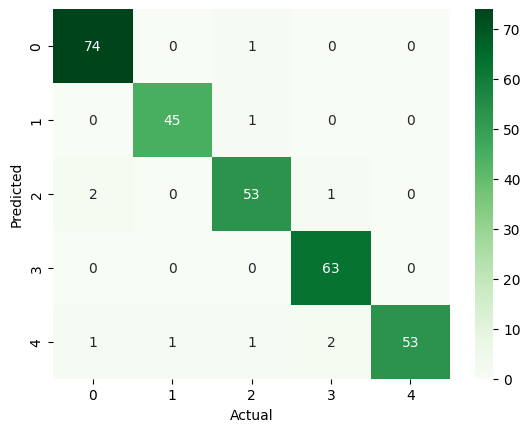

In [39]:
model_LR = LogisticRegression()
model_LR.fit(X_train_transformed, Y_train_transformed)
Y_predicted_LR = model_LR.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_LR == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_LR,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_LR)

**Random Forest Classifier**

Average accuracy on test set=0.9496644295302014
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        79
           1       0.93      0.96      0.95        45
           2       0.93      0.95      0.94        55
           3       1.00      0.93      0.96        68
           4       0.88      1.00      0.94        51

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



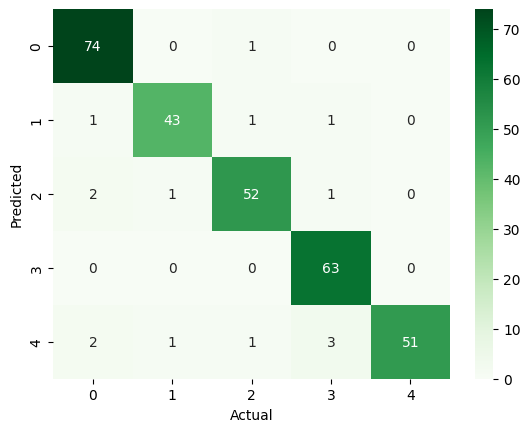

In [40]:
model_RFC = RandomForestClassifier(max_depth=10, random_state=18)
model_RFC.fit(X_train_transformed, Y_train_transformed)
Y_predicted_RFC = model_RFC.predict(TfIdf_Vectorizer.transform(X_test))
print('Average accuracy on test set={}'.format(np.mean(Y_predicted_RFC == label_fit.transform(Y_test))))
print(classification_report(Y_predicted_RFC,Y_test_transformed))


plot_matrix(Y_test_transformed, Y_predicted_RFC)

## ML Models pickel files

In [41]:

with open("models/model_BNB.pk", "wb") as f:
    pk.dump(model_BNB, f)

with open("models/model_CNB.pk", "wb") as f:
    pk.dump(model_CNB, f)

with open("models/model_MNB.pk", "wb") as f:
    pk.dump(model_MNB, f)

with open("models/model_RFC.pk", "wb") as f:
    pk.dump(model_RFC, f)

with open("models/model_SGD.pk", "wb") as f:
    pk.dump(model_SGD, f)

with open("models/model_Lreg.pk", "wb") as f:
    pk.dump(model_SGD, f)

with open("models/model_MNB.pk", "rb") as f:
    model_MNB = pk.load(f)   

with open("models/model_BNB.pk", "rb") as f:
    model_BNB = pk.load(f)   

with open("models/model_CNB.pk", "rb") as f:
    model_CNB = pk.load(f)   

with open("models/model_SGD.pk", "rb") as f:
    model_SGD = pk.load(f)   

with open("models/model_Lreg.pk", "rb") as f:
    model_Lreg = pk.load(f)   

with open("models/model_RFC.pk", "rb") as f:
    model_RFC = pk.load(f)   


## Deep Learning Prerequisite

**Hyperparameter Tuning**

In [42]:
EMBEDDING_DIMENSION = 100
VOCABULARY_SIZE = 10000
MAX_LENGTH = 1000
OOV_TOK = '<OOV>'
TRUNCATE_TYPE = 'pre'
PADDING_TYPE = 'pre'

tokenizer = Tokenizer(num_words=VOCABULARY_SIZE, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,oov_token=OOV_TOK)
tokenizer.fit_on_texts(data_frame_train['Token'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17801 unique tokens.


**Pad Sequence**

In [43]:
X = tokenizer.texts_to_sequences(data_frame_train['Token'].values)
pad_sequence_X = pad_sequences(X, maxlen=MAX_LENGTH,padding=PADDING_TYPE, truncating=TRUNCATE_TYPE)
print('Shape of data tensor:', pad_sequence_X.shape)

Shape of data tensor: (1490, 1000)


**Tokenization pickle file**

In [44]:
with open("Tokenizer/tokenizer.pk", "wb") as f:
    pk.dump(tokenizer, f)


with open("Tokenizer/tokenizer.pk", "rb") as f:
    tokenizer = pk.load(f)

In [45]:
with open("pad sequence/pad_sequence_X.pk", "wb") as f:
    pk.dump(pad_sequence_X, f)


with open("pad sequence/pad_sequence_X.pk", "rb") as f:
    pad_sequence_X = pk.load(f)

**Conversion of label category into numbers**

In [46]:
Y = pd.get_dummies(data_frame_train['Category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1490, 5)


**Train Test Split**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(pad_sequence_X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1192, 1000)
(298, 1000)
(1192, 5)
(298, 5)


In [48]:
Y_test

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]], dtype=uint8)

## LSTM Model

In [50]:
n_lstm = 128
drop_lstm = 0.2

In [92]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIMENSION, input_length=pad_sequence_X.shape[1]))
model_LSTM.add(SpatialDropout1D(drop_lstm))
model_LSTM.add(LSTM(n_lstm,return_sequences=False,  dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dropout(drop_lstm))
model_LSTM.add(Dense(5, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode = min, patience=3, min_delta=0.0001)

2023-01-07 19:16:14,357 : WARNING : EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.


In [51]:
from tensorflow.keras.utils import plot_model
print(model_LSTM.summary())
plot_model(model_LSTM, to_file='model.png', show_shapes=True, show_layer_names=True)

NameError: name 'model_LSTM' is not defined

In [94]:
history = model_LSTM.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=64,validation_split=0.1,callbacks=[es])

Epoch 1/10
19/19 [==============================] - 393s 21s/step - loss: 1.5999 - accuracy: 0.2928 - val_loss: 1.5739 - val_accuracy: 0.2181
Epoch 2/10
19/19 [==============================] - 398s 21s/step - loss: 1.5259 - accuracy: 0.4295 - val_loss: 1.3186 - val_accuracy: 0.4094
Epoch 3/10
19/19 [==============================] - 401s 21s/step - loss: 1.3050 - accuracy: 0.5696 - val_loss: 1.0896 - val_accuracy: 0.5638
Epoch 4/10
19/19 [==============================] - 405s 21s/step - loss: 0.9902 - accuracy: 0.6426 - val_loss: 0.8085 - val_accuracy: 0.6376
Epoch 5/10
19/19 [==============================] - 407s 21s/step - loss: 0.6816 - accuracy: 0.7332 - val_loss: 0.8149 - val_accuracy: 0.6779
Epoch 6/10
19/19 [==============================] - 418s 22s/step - loss: 0.4658 - accuracy: 0.8993 - val_loss: 0.5001 - val_accuracy: 0.8523
Epoch 7/10
19/19 [==============================] - 421s 22s/step - loss: 0.3176 - accuracy: 0.8842 - val_loss: 0.3932 - val_accuracy: 0.8356
Epoch 

In [106]:
score = model_LSTM.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3868628740310669
Test accuracy: 0.8557047247886658


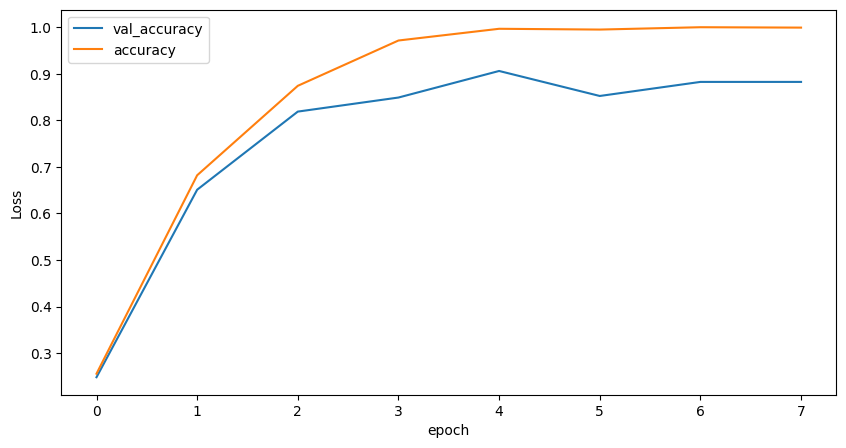

In [107]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

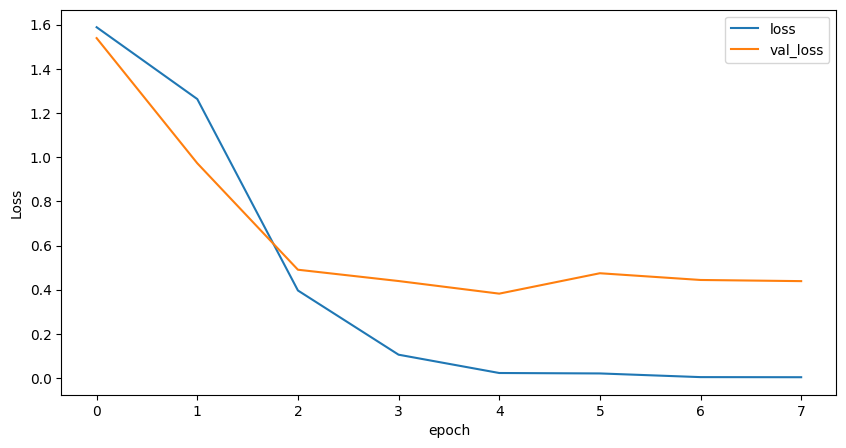

In [108]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [121]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def model_evaluation(Y_actual, Y_predicted):
    model_LSTM_accuracy  = accuracy_score(Y_actual, Y_predicted) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(Y_actual, Y_predicted, average="weighted")

    model_evaluation_results = {'Accuracy' : model_LSTM_accuracy,
                                'Precision' : model_LSTM_accuracy,
                                'Recall': model_recall, 
                                'F1 Score': model_f1}
    return model_evaluation_results                                                
    

In [125]:
LSTM_results = model_evaluation(Y_test, Y_predicted_LSTM)
LSTM_results

{'Accuracy': 83.22147651006712,
 'Precision': 83.22147651006712,
 'Recall': 0.8322147651006712,
 'F1 Score': 0.8362558608683566}

In [126]:
model_LSTM.evaluate(X_test,Y_test)
model_LSTM_accuracy  = accuracy_score(Y_test, Y_predicted_LSTM)

10/10 [==============================] - 4s 383ms/step - loss: 0.3869 - accuracy: 0.8557


In [109]:
Y_predicted_LSTM = (model_LSTM.predict(X_test) >= 0.5).astype("int")

10/10 [==============================] - 4s 397ms/step


In [127]:
print(classification_report(Y_test, Y_predicted_LSTM))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.84      1.00      0.91        46
           2       0.91      0.38      0.53        56
           3       0.97      1.00      0.98        63
           4       0.70      0.79      0.74        58

   micro avg       0.88      0.83      0.85       298
   macro avg       0.88      0.83      0.83       298
weighted avg       0.89      0.83      0.84       298
 samples avg       0.83      0.83      0.83       298



C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Actual')

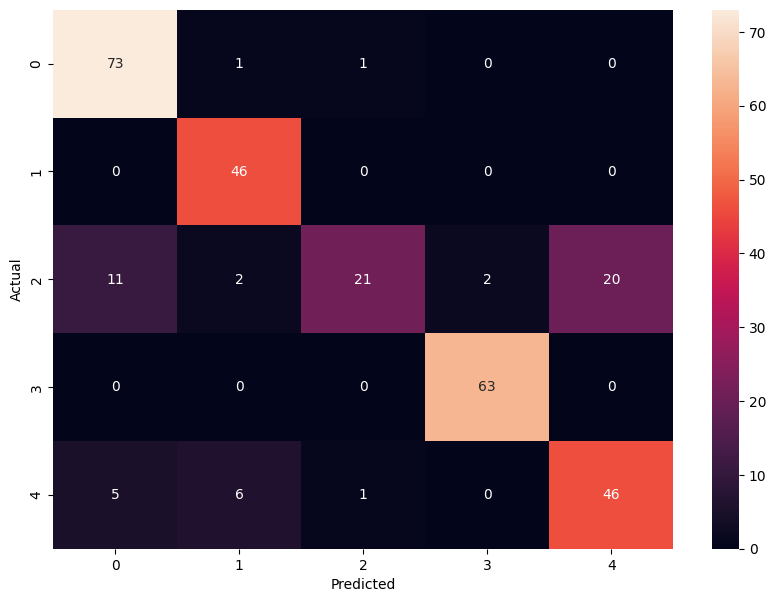

In [128]:
cm_LSTM = confusion_matrix(Y_test.argmax(axis=1), Y_predicted_LSTM.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm_LSTM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [164]:
model_LSTM_probabilities = model_LSTM.predict(X_test)
model_LSTM_probabilities[:5]

10/10 [==============================] - 4s 394ms/step


array([[3.2511081e-03, 9.8161960e-01, 2.1439202e-03, 7.6012267e-03,
        5.3841406e-03],
       [2.6432320e-03, 7.9473360e-03, 2.9442406e-01, 3.2443269e-03,
        6.9174105e-01],
       [4.8331609e-03, 7.1012317e-03, 9.2409968e-01, 4.3036062e-03,
        5.9662201e-02],
       [5.3337857e-04, 2.4475867e-03, 2.9727817e-02, 7.6199934e-04,
        9.6652925e-01],
       [1.8283235e-03, 2.2899708e-02, 3.6902625e-02, 3.2736829e-03,
        9.3509561e-01]], dtype=float32)

In [165]:
model_LSTM_predict_labels = tensorflow.argmax(model_LSTM_probabilities, axis=1)
model_LSTM_predict_labels

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 4, 2, 4, 4, 0, 4, 1, 2, 4, 4, 1, 2, 3, 4, 4, 0, 3, 2, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 4, 1, 0, 1, 0, 3, 0, 4, 0,
       3, 0, 4, 4, 2, 0, 3, 3, 0, 3, 4, 1, 1, 1, 0, 1, 4, 0, 1, 4, 4, 4,
       1, 4, 4, 2, 4, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 2, 2, 4, 0, 1, 4, 4, 1, 2, 1, 4, 1, 3, 4, 3, 2, 3, 0, 4,
       4, 0, 2, 1, 4, 0, 4, 0, 1, 0, 1, 3, 0, 4, 0, 0, 4, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 0, 1, 0, 1, 0, 1, 4, 3, 1, 2, 0, 4, 2, 0, 3, 0, 1, 3,
       1, 4, 1, 3, 4, 3, 3, 4, 0, 4, 4, 4, 4, 3, 3, 1, 2, 4, 1, 1, 0, 1,
       1, 3, 0, 0, 3, 3, 4, 1, 1, 0, 4, 2, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 4, 3, 1, 0, 3, 4, 4, 0, 0, 3, 4, 0, 1, 3, 4, 2, 3, 4, 4,
       3, 4, 0, 0, 1, 1, 0, 2, 4, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 3, 4, 1,
       1, 1, 0, 0, 1, 1, 3, 1, 3, 2, 4, 3, 2, 4, 1, 3, 4, 0, 0, 2, 1, 4,
       4, 3, 3, 0, 4, 1, 3, 3, 4, 3, 3, 2, 3, 3, 0, 2, 1, 0, 0, 4, 0, 0,
     

# Bi-Directional LSTM

In [52]:
model_Bi_LSTM = Sequential()
model_Bi_LSTM.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIMENSION, input_length=pad_sequence_X.shape[1]))
model_Bi_LSTM.add(SpatialDropout1D(0.3))
model_Bi_LSTM.add(Bidirectional(LSTM(EMBEDDING_DIMENSION, dropout=drop_lstm)))
model_Bi_LSTM.add(Dense(EMBEDDING_DIMENSION, activation='relu'))
model_Bi_LSTM.add(Dropout(drop_lstm))
model_Bi_LSTM.add(Dense(EMBEDDING_DIMENSION, activation='relu'))
model_Bi_LSTM.add(Dropout(drop_lstm))
model_Bi_LSTM.add(Dense(5, activation='softmax'))
model_Bi_LSTM.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode = min, patience=3, min_delta=0.0001)

2023-01-10 22:34:25,345 : WARNING : EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.


In [53]:
from tensorflow.keras.utils import plot_model
print(model_Bi_LSTM.summary())
plot_model(model_Bi_LSTM, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 100)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               1

In [54]:
history = model_Bi_LSTM.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=16,validation_split=0.1,callbacks=[es])

Epoch 1/10
75/75 [==============================] - 197s 2s/step - loss: 1.5284 - accuracy: 0.3070 - val_loss: 1.1587 - val_accuracy: 0.4027
Epoch 2/10
75/75 [==============================] - 168s 2s/step - loss: 0.9405 - accuracy: 0.5772 - val_loss: 0.7673 - val_accuracy: 0.6913
Epoch 3/10
75/75 [==============================] - 152s 2s/step - loss: 0.6450 - accuracy: 0.7139 - val_loss: 0.6119 - val_accuracy: 0.7450
Epoch 4/10
75/75 [==============================] - 139s 2s/step - loss: 0.5147 - accuracy: 0.7626 - val_loss: 0.6994 - val_accuracy: 0.6946
Epoch 5/10
75/75 [==============================] - 142s 2s/step - loss: 0.3479 - accuracy: 0.8356 - val_loss: 0.5628 - val_accuracy: 0.8490
Epoch 6/10
75/75 [==============================] - 167s 2s/step - loss: 0.1855 - accuracy: 0.9488 - val_loss: 0.4955 - val_accuracy: 0.8725
Epoch 7/10
75/75 [==============================] - 149s 2s/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.4092 - val_accuracy: 0.8859
Epoch 8/10
75

In [55]:
score = model_Bi_LSTM.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.33436375856399536
Test accuracy: 0.9228187799453735


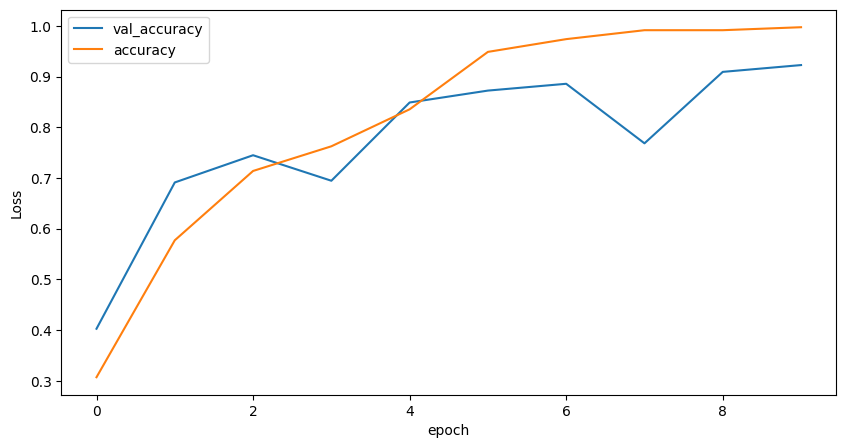

In [56]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

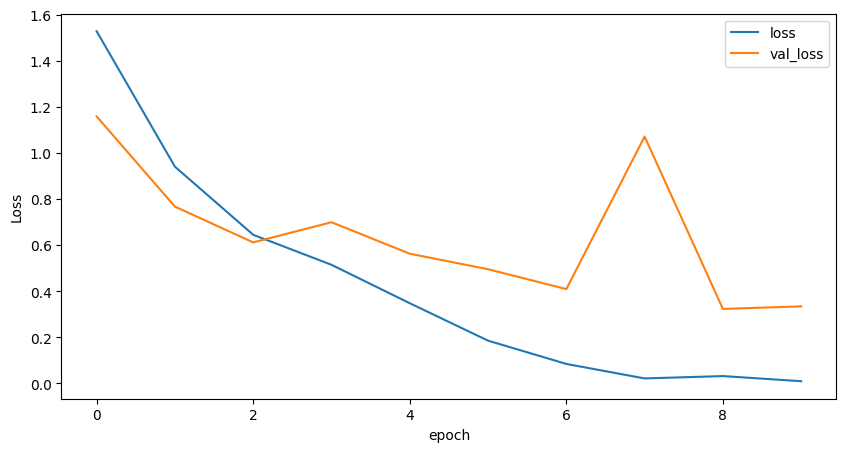

In [57]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [58]:
model_Bi_LSTM.evaluate(X_test,Y_test)

10/10 [==============================] - 6s 553ms/step - loss: 0.3344 - accuracy: 0.9228


[0.33436375856399536, 0.9228187799453735]

In [59]:
Y_predicted_Bi_LSTM = (model_Bi_LSTM.predict(X_test) >= 0.5).astype("int")

10/10 [==============================] - 7s 515ms/step


In [60]:
Bi_LSTM_results = model_evaluation(Y_test, Y_predicted_Bi_LSTM)
Bi_LSTM_results

NameError: name 'model_evaluation' is not defined

In [ ]:
model_Bi_LSTM.evaluate(X_test,Y_test)
model_Bi_LSTM_accuracy  = accuracy_score(Y_test, Y_predicted_Bi_LSTM)


10/10 [==============================] - 6s 608ms/step - loss: 0.6019 - accuracy: 0.8725


In [ ]:
print(classification_report(Y_test, Y_predicted_Bi_LSTM))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        75
           1       0.81      0.85      0.83        46
           2       0.81      0.84      0.82        56
           3       0.98      0.95      0.97        63
           4       0.88      0.74      0.80        58

   micro avg       0.88      0.87      0.88       298
   macro avg       0.87      0.87      0.87       298
weighted avg       0.88      0.87      0.87       298
 samples avg       0.87      0.87      0.87       298



C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Actual')

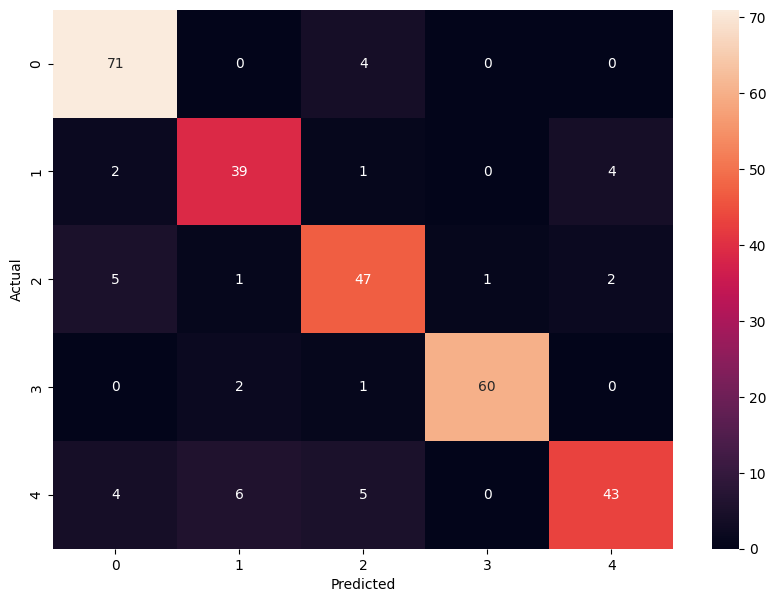

In [ ]:
cm_Bi_LSTM = confusion_matrix(Y_test.argmax(axis=1), Y_predicted_Bi_LSTM.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm_Bi_LSTM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [62]:
model_Bi_LSTM_probabilities = model_Bi_LSTM.predict(X_test)
model_Bi_LSTM_probabilities[:5]

10/10 [==============================] - 5s 512ms/step


array([[5.71675599e-03, 2.74663069e-03, 2.06573140e-02, 5.35652043e-06,
        9.70873952e-01],
       [2.11285297e-07, 2.14936390e-05, 9.99894738e-01, 2.00251834e-05,
        6.35102697e-05],
       [1.99802400e-07, 1.59025894e-05, 9.99912024e-01, 3.05810972e-05,
        4.12812769e-05],
       [2.78179301e-04, 6.32234733e-04, 1.78495459e-02, 1.09107134e-07,
        9.81239855e-01],
       [3.63611296e-04, 1.50054488e-02, 5.70231229e-02, 4.97504800e-07,
        9.27607298e-01]], dtype=float32)

In [63]:
model_Bi_LSTM_predict_labels = tensorflow.argmax(model_Bi_LSTM_probabilities, axis=1)
model_Bi_LSTM_predict_labels

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([4, 2, 2, 4, 4, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 2, 0, 3, 2, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 4, 2, 0, 1, 0, 3, 4, 2, 0,
       3, 0, 2, 4, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 2, 4, 4, 4,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 2, 2, 4, 0, 2, 4, 0, 1, 2, 1, 2, 1, 3, 4, 3, 4, 3, 0, 4,
       4, 0, 4, 1, 4, 2, 0, 0, 1, 0, 4, 3, 0, 2, 0, 0, 4, 4, 2, 1, 0, 3,
       2, 3, 0, 4, 4, 1, 0, 1, 0, 1, 4, 3, 1, 2, 4, 4, 2, 2, 3, 0, 2, 3,
       1, 4, 4, 3, 4, 3, 2, 2, 0, 4, 2, 2, 4, 3, 3, 1, 2, 4, 4, 1, 0, 2,
       1, 3, 0, 0, 3, 3, 4, 1, 1, 0, 4, 2, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 0, 3, 4, 4, 0, 4, 3, 2, 0, 1, 3, 0, 2, 3, 4, 2,
       3, 4, 0, 0, 1, 4, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 2, 3, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 3, 4, 2, 2, 4, 3, 2, 4, 1, 3, 4, 0, 0, 2, 4, 4,
       4, 3, 3, 0, 2, 2, 3, 3, 4, 3, 3, 2, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0,
     

## GRU: Gated Recurrent Unit

In [103]:
model_GRU = Sequential()
model_GRU.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIMENSION, input_length=pad_sequence_X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(GRU(EMBEDDING_DIMENSION, return_sequences = False))
model_GRU.add(Dropout(drop_lstm))
model_GRU.add(Dense(5, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode = min, patience=3, min_delta=0.0001)

2023-01-07 21:21:04,605 : WARNING : EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.


In [104]:
from tensorflow.keras.utils import plot_model
print(model_GRU.summary())
plot_model(model_GRU, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 100)         1000000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 1000, 100)        0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,061,105
Trainable params: 1,061,105
Non-trainable params: 0
____________________________________________

In [105]:
history = model_GRU.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=16,validation_split=0.1,callbacks=[es])

Epoch 1/10
75/75 [==============================] - 70s 880ms/step - loss: 1.5887 - accuracy: 0.2559 - val_loss: 1.5393 - val_accuracy: 0.2483
Epoch 2/10
75/75 [==============================] - 69s 910ms/step - loss: 1.2634 - accuracy: 0.6820 - val_loss: 0.9727 - val_accuracy: 0.6510
Epoch 3/10
75/75 [==============================] - 64s 849ms/step - loss: 0.3965 - accuracy: 0.8742 - val_loss: 0.4905 - val_accuracy: 0.8188
Epoch 4/10
75/75 [==============================] - 62s 830ms/step - loss: 0.1057 - accuracy: 0.9715 - val_loss: 0.4393 - val_accuracy: 0.8490
Epoch 5/10
75/75 [==============================] - 63s 831ms/step - loss: 0.0228 - accuracy: 0.9966 - val_loss: 0.3822 - val_accuracy: 0.9060
Epoch 6/10
75/75 [==============================] - 62s 833ms/step - loss: 0.0208 - accuracy: 0.9950 - val_loss: 0.4746 - val_accuracy: 0.8523
Epoch 7/10
75/75 [==============================] - 61s 815ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4441 - val_accuracy: 0.8826

In [145]:
score = model_GRU.evaluate(X_test, Y_test, verbose = 0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.4388255774974823
Test accuracy: 0.8825503587722778


In [146]:
Y_predicted_GRU = (model_GRU.predict(X_test) >= 0.5).astype("int")

10/10 [==============================] - 6s 457ms/step


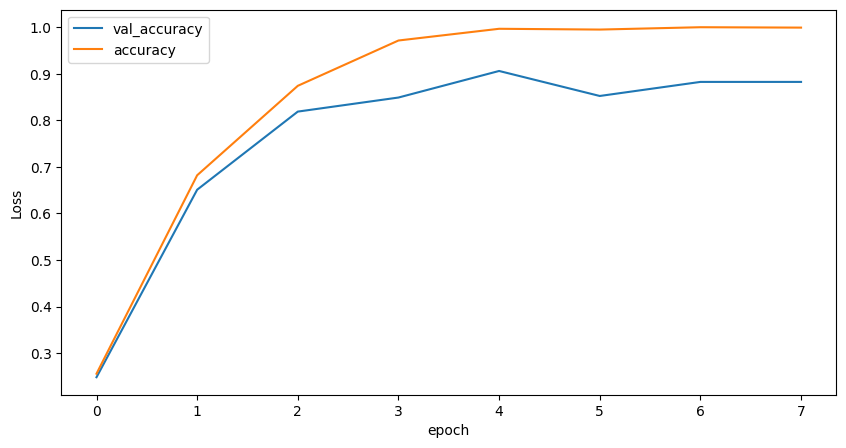

In [147]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

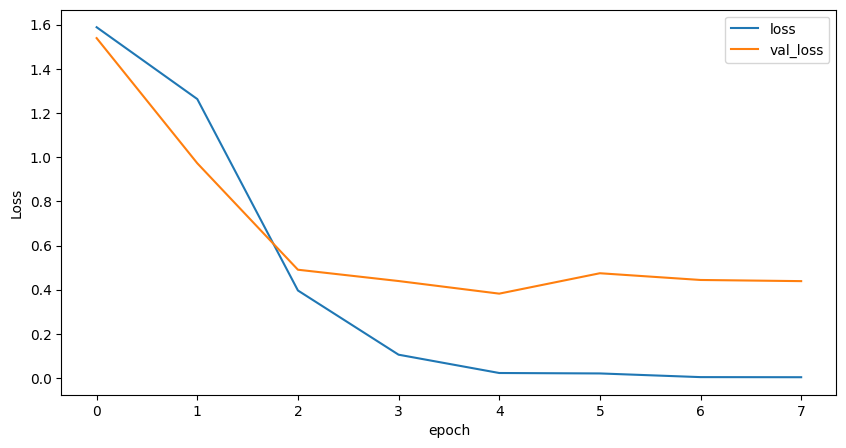

In [148]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [149]:
GRU_results = model_evaluation(Y_test, Y_predicted_GRU)
GRU_results

{'Accuracy': 87.58389261744966,
 'Precision': 87.58389261744966,
 'Recall': 0.8758389261744967,
 'F1 Score': 0.8859076055320173}

In [150]:
model_GRU.evaluate(X_test,Y_test)
model_GRU_accuracy  = accuracy_score(Y_test, Y_predicted_GRU)

10/10 [==============================] - 5s 478ms/step - loss: 0.4388 - accuracy: 0.8826


In [151]:
print(classification_report(Y_test, Y_predicted_GRU))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        75
           1       0.82      0.89      0.85        46
           2       0.85      0.82      0.84        56
           3       0.97      1.00      0.98        63
           4       0.95      0.72      0.82        58

   micro avg       0.90      0.88      0.89       298
   macro avg       0.90      0.87      0.88       298
weighted avg       0.90      0.88      0.89       298
 samples avg       0.88      0.88      0.88       298



C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
print(classification_report(Y_test, Y_predicted_GRU))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        75
           1       0.82      0.89      0.85        46
           2       0.85      0.82      0.84        56
           3       0.97      1.00      0.98        63
           4       0.95      0.72      0.82        58

   micro avg       0.90      0.88      0.89       298
   macro avg       0.90      0.87      0.88       298
weighted avg       0.90      0.88      0.89       298
 samples avg       0.88      0.88      0.88       298



C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Actual')

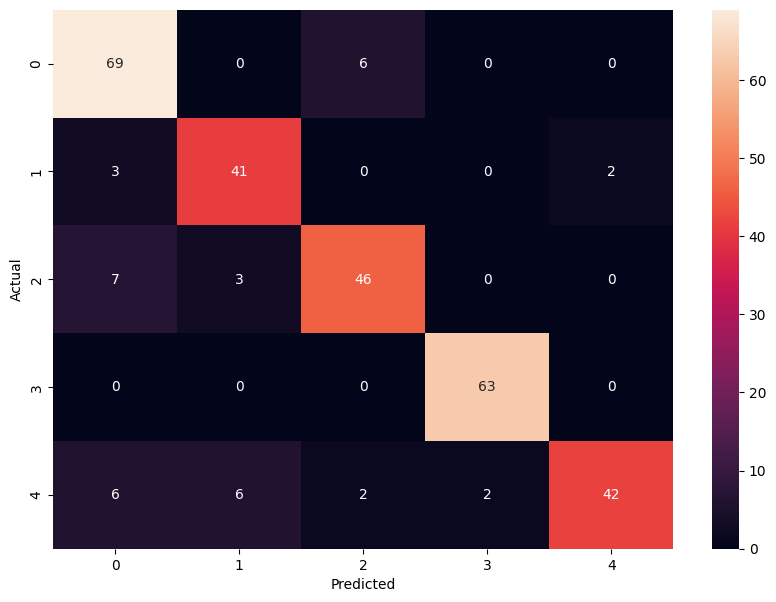

In [153]:
cm_GRU = confusion_matrix(Y_test.argmax(axis=1), Y_predicted_GRU.argmax(axis=1))
plt.figure(figsize=(10,7))
sns.heatmap(cm_GRU, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [158]:
model_GRU_probabilities = model_GRU.predict(X_test)
model_GRU_probabilities[:5]

10/10 [==============================] - 6s 554ms/step


array([[1.30517185e-02, 7.50148952e-01, 5.26567176e-03, 9.43248272e-02,
        1.37208834e-01],
       [4.71820036e-04, 2.48474418e-03, 9.97028649e-01, 1.20024270e-05,
        2.70308783e-06],
       [1.88102698e-04, 1.94460008e-04, 9.99611199e-01, 5.93447157e-06,
        2.92739088e-07],
       [4.24562814e-03, 5.88472068e-01, 7.43182376e-02, 3.26789427e-03,
        3.29696208e-01],
       [2.02004856e-04, 7.15257883e-01, 4.97306173e-04, 1.20653957e-03,
        2.82836288e-01]], dtype=float32)

In [159]:
model_GRU_predict_labels = tensorflow.argmax(model_GRU_probabilities, axis=1)
model_GRU_predict_labels

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 2, 2, 1, 1, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 0, 0, 3, 2, 2, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 4, 1, 0, 1, 0, 3, 2, 2, 0,
       3, 0, 2, 4, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 1, 4, 4, 4,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 2, 0, 4, 0, 0, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 0, 3, 0, 4,
       3, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 4, 3, 2, 0, 0, 3,
       1, 3, 0, 2, 0, 1, 0, 1, 0, 1, 4, 3, 4, 2, 2, 4, 2, 2, 3, 0, 1, 3,
       1, 4, 1, 3, 4, 3, 3, 2, 0, 4, 2, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 1,
       1, 3, 0, 0, 3, 3, 4, 1, 1, 0, 4, 2, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 0, 3, 4, 4, 0, 0, 3, 2, 0, 1, 3, 0, 2, 3, 4, 2,
       3, 1, 0, 0, 1, 4, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 3, 4, 1, 2, 0, 3, 2, 4, 1, 3, 0, 0, 0, 2, 4, 4,
       4, 3, 3, 0, 2, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 2, 0, 0, 2, 0, 0,
     

In [174]:
all_model_results = pd.DataFrame({"LSTM": LSTM_results,"Bidirectional": Bi_LSTM_results,"GRU": GRU_results})

In [175]:
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1 Score
LSTM,83.221477,83.221477,0.832215,0.836256
Bidirectional,87.248322,87.248322,0.872483,0.874631
GRU,87.583893,87.583893,0.875839,0.885908


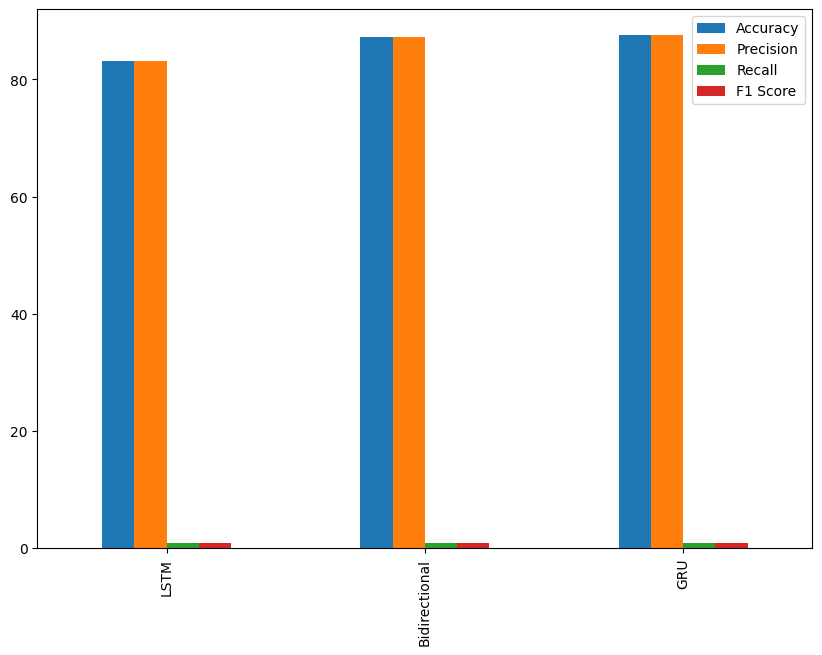

In [176]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

## Save and load DL models

In [177]:
model_LSTM.save('models/model_LSTM.h5')
model_LSTM.save_weights('models/model_LSTM_weights.h5')

In [203]:
model_GRU.save('models/model_GRU.h5')
model_GRU.save_weights('models/model_GRU_weights.h5')

In [64]:
model_Bi_LSTM.save('models/model_Bi_LSTM.h5')
model_Bi_LSTM.save_weights('models/model_Bi_LSTM_weights.h5')

In [180]:
# load model
load_model_LSTM =tensorflow.keras.models.load_model('models/model_LSTM.h5')
# Summary
load_model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 1,117,893
Trainable params: 1,117,893
Non-trainable params: 0
______________________________________________

In [68]:
import random
try:
  test_sentences = data_frame_test['Text'].to_list()
  test_samples = random.sample(test_sentences, 1)
  for test_sample in test_samples:
    message = preprocessing(str(test_sample))
    input = [message]
    input_sequences = tokenizer.texts_to_sequences(input)
    input_pad = pad_sequences(input_sequences, padding='pre', maxlen=MAX_LENGTH,truncating=TRUNCATE_TYPE)
    pred_probs = model_Bi_LSTM.predict(input_pad)
    preds = tensorflow.argmax(pred_probs, axis=1)

    print(f"Pred: {preds}, label: {class_names[preds]}")
    print(f"Text:\n{test_sample}\n")
    
    print("---------------------------------------------------------\n")
except Exception as e:
  print(f'Error raised!!: {e}') 

1/1 [==============================] - 0s 211ms/step
Pred: [3], label: sport
Text:
italy 8-38 wales wales secured their first away win in the rbs six nations for nearly four years with a six-try victory in rome.  tries from jonathan thomas  tom shanklin and martyn williams gave the visitors a 19-5 half-time advantage. luciano orquera did reply with one for italy but second-half efforts from brent cockbain  shane williams and robert sidoli sealed victory. fly-half stephen jones added four conversions as wales maintained their superb start to this year s tournament. starting full of confidence after their victory over england  the visitors scored the opening try after just four minutes. diminutive wing shane williams fielded a kick ahead and danced past the onrushing andrea masi and aaron persico into the italian half. his pass to tom shanklin appeared forward but when the centre was held up short  the ball was switched left and michael owen s long cut-out pass gave the lurking thomas an

C:\Users\hp\AppData\Local\Temp\ipykernel_15176\2096236773.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print(f"Pred: {preds}, label: {class_names[preds]}")


In [98]:
def detect_catagory_dl(model, sentence):
    try:
        message = preprocessing(sentence)
        test_sentences = list(message.split(' '))
        # print(test_sentences)
        input_sequences = tokenizer.texts_to_sequences(sentence)
        input_pad = pad_sequences(input_sequences,maxlen=MAX_LENGTH)
        labels = {0:'Business', 1:'Entertainment',2:'Politics', 3:'Sport',4:'Technology'}
        #res = model_Bi_LSTM.predict(np.expand_dims(input_pad,axis=0)).flatten()
        pred = model_Bi_LSTM.predict(np.expand_dims(input_pad),axis=0).flatten()
        cat = labels[np.argmax(pred.flatten())]
           
        #preds = tensorflow.argmax(pred_probs, axis=1)
        # print('a')
        #output = labels[np.argmax(pred)]
        #print(pred, labels[np.argmax(pred)])
        #print(res)
        print(cat)
        #print(pred,np.argmax(pred))
    except Exception as e:
        print(f'Error raised!!: {e}') 

In [99]:
detect_catagory_dl(model_Bi_LSTM, article1)

Error raised!!: _expand_dims_dispatcher() missing 1 required positional argument: 'axis'
